# **Generating Synthetic Data**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load the original dataset from CSV
original_data = pd.read_csv('/content/retail_price.csv')

In [ ]:
# Define the number of synthetic data rows to generate
num_synthetic_points = 50000 - len(original_data)  # Calculate the remaining rows needed
print(num_synthetic_points)

49324


In [ ]:
# Data augmentation process
augmented_data = []

In [ ]:
# Perform data augmentation to generate synthetic data

# Here, we'll generate random variations of the original data
for _ in range(num_synthetic_points):
    # Example: Randomly select a row from the original dataset and create a variation
    random_row = original_data.sample(n=1, replace=True)
    variation = random_row.copy()

    # Modify the variation as desired, for example, add random noise to numerical columns
    variation['qty'] += np.random.normal(0, 1)  # Adding Gaussian noise

    # Append the variation to the augmented dataset
    augmented_data.append(variation)

In [ ]:
# Concatenate the original dataset with the augmented dataset
augmented_data = pd.concat([original_data] + augmented_data, ignore_index=True)
print(augmented_data)

      product_id product_category_name  month_year        qty  total_price  \
0           bed1        bed_bath_table  01-05-2017   1.000000        45.95   
1           bed1        bed_bath_table  01-06-2017   3.000000       137.85   
2           bed1        bed_bath_table  01-07-2017   6.000000       275.70   
3           bed1        bed_bath_table  01-08-2017   4.000000       183.80   
4           bed1        bed_bath_table  01-09-2017   2.000000        91.90   
...          ...                   ...         ...        ...          ...   
49995      cool5            cool_stuff  01-12-2017   1.623729       299.97   
49996   watches5         watches_gifts  01-05-2018  18.848776      3383.00   
49997    garden7          garden_tools  01-07-2018   5.634951       299.40   
49998       bed2        bed_bath_table  01-08-2017  35.847138      3326.30   
49999    garden1          garden_tools  01-07-2018   6.429813       699.93   

       freight_price  unit_price  product_name_lenght  \
0     

In [ ]:
# Save the augmented dataset to a new CSV file
augmented_data.to_csv('retail_augmented.csv', index=False)

# **Testing Generated Data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the augmented dataset from CSV
augmented_data = pd.read_csv('/content/retail_augmented.csv')

In [ ]:
# Select the columns to be one-hot encoded
columns_to_encode = ['product_category_name', 'month_year', 'product_id']  # Add the column names you want to encode

# Perform one-hot encoding
encoded_data = pd.get_dummies(augmented_data, columns=columns_to_encode)

# Print the encoded data
encoded_data.head()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,product_id_perfumery1,product_id_perfumery2,product_id_watches1,product_id_watches2,product_id_watches3,product_id_watches4,product_id_watches5,product_id_watches6,product_id_watches7,product_id_watches8
0,1.0,45.95,15.100000,45.95,39,161,2,350,4.0,57,...,0,0,0,0,0,0,0,0,0,0
1,3.0,137.85,12.933333,45.95,39,161,2,350,4.0,61,...,0,0,0,0,0,0,0,0,0,0
2,6.0,275.70,14.840000,45.95,39,161,2,350,4.0,123,...,0,0,0,0,0,0,0,0,0,0
3,4.0,183.80,14.287500,45.95,39,161,2,350,4.0,90,...,0,0,0,0,0,0,0,0,0,0
4,2.0,91.90,15.100000,45.95,39,161,2,350,4.0,54,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Split the augmented dataset into training and validation/test sets
X = encoded_data.drop('lag_price', axis=1)
y = encoded_data['lag_price']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Evaluate model performance on the original validation/test set
original_data = pd.read_csv('/content/retail_price.csv')  # Load the original dataset

# Select the columns to be one-hot encoded
columns_to_encode = ['product_category_name', 'month_year', 'product_id']  # Add the column names you want to encode

# Perform one-hot encoding
original_data = pd.get_dummies(augmented_data, columns=columns_to_encode)

# Print the encoded data
original_data.head()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,product_id_perfumery1,product_id_perfumery2,product_id_watches1,product_id_watches2,product_id_watches3,product_id_watches4,product_id_watches5,product_id_watches6,product_id_watches7,product_id_watches8
0,1.0,45.95,15.100000,45.95,39,161,2,350,4.0,57,...,0,0,0,0,0,0,0,0,0,0
1,3.0,137.85,12.933333,45.95,39,161,2,350,4.0,61,...,0,0,0,0,0,0,0,0,0,0
2,6.0,275.70,14.840000,45.95,39,161,2,350,4.0,123,...,0,0,0,0,0,0,0,0,0,0
3,4.0,183.80,14.287500,45.95,39,161,2,350,4.0,90,...,0,0,0,0,0,0,0,0,0,0
4,2.0,91.90,15.100000,45.95,39,161,2,350,4.0,54,...,0,0,0,0,0,0,0,0,0,0


**Creating LR Model to test new augmented data**

In [ ]:
X_orig = original_data.drop('lag_price', axis=1)
y_orig = original_data['lag_price']

In [ ]:
# Train the model on the augmented dataset
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
orig_pred = model.predict(X_orig)
orig_mse = mean_squared_error(y_orig, orig_pred)

In [ ]:
# Evaluate model performance on the augmented validation/test set
aug_pred = model.predict(X_val)
aug_mse = mean_squared_error(y_val, aug_pred)

In [ ]:
# Compare model performance
print("Original Dataset MSE:", orig_mse)
print("Augmented Dataset MSE:", aug_mse)

Original Dataset MSE: 39.52266668058067
Augmented Dataset MSE: 41.141334394464074


# **EDA**

In [ ]:
from sklearn.preprocessing import  StandardScaler , OneHotEncoder, OrdinalEncoder,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.metrics import  mean_squared_error, r2_score, mean_absolute_percentage_error, median_absolute_error, PredictionErrorDisplay

In [ ]:
# Features Description

"""
customers (integer) - monthly demand for a given subcategory of goods
freight_price (float) - freight price of the company goods
fp1, fp2, fp3 (float) - freight price of competitors 1,2,3 goods respectively
product_category_name (categorical) - broad group category name
product_id (categorical) - detailed group subcategory name
product_description_length (integer) - Number of words in the subcategory description
product_score (float) - user rating for subcategories of the company goods
ps1, ps2, ps3 (float) - user rating for subcategories of competitors 1,2,3 respectively
product_photos_qty (integer) - number of photos for each subcategory (product_id)
product_weight_g (integer) - unit weight in grams
total_price (float) - montly revenue which can be calculated using formula: total_price = unit_price * qty
month_year (string) - data in the format (dd-mm-yyyy) within the range between 01-01-2017 and 01-08-2018. Only months and years are important here.
year (integer) - year which was taken from the 'month_year'
month (integer) - month which was taken from the 'month_year'
qty (integer) - monthly sales per subcategory
unit_price (float) - monthly unit price of subcategory good of company goods
comp_1, comp_2, comp_3 (float) - unit price of within the subcategory of competitors 1,2,3 goods respectively
lag_price (float) - unit price on the previous month
weekend (integer) - number of weekends per month
weekday (integer) - number of weekdays per month
holiday (integer) - number of holidays per month
s (float) - yet unknown parameter
"""

"\ncustomers (integer) - monthly demand for a given subcategory of goods\nfreight_price (float) - freight price of the company goods\nfp1, fp2, fp3 (float) - freight price of competitors 1,2,3 goods respectively\nproduct_category_name (categorical) - broad group category name\nproduct_id (categorical) - detailed group subcategory name\nproduct_description_length (integer) - Number of words in the subcategory description\nproduct_score (float) - user rating for subcategories of the company goods\nps1, ps2, ps3 (float) - user rating for subcategories of competitors 1,2,3 respectively\nproduct_photos_qty (integer) - number of photos for each subcategory (product_id)\nproduct_weight_g (integer) - unit weight in grams\ntotal_price (float) - montly revenue which can be calculated using formula: total_price = unit_price * qty\nmonth_year (string) - data in the format (dd-mm-yyyy) within the range between 01-01-2017 and 01-08-2018. Only months and years are important here.\nyear (integer) - ye

In [ ]:
# Load the augmented dataset from CSV
data = pd.read_csv('/content/retail_augmented.csv')

In [ ]:
data.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1.0,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3.0,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6.0,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4.0,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2.0,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  50000 non-null  object 
 1   product_category_name       50000 non-null  object 
 2   month_year                  50000 non-null  object 
 3   qty                         50000 non-null  float64
 4   total_price                 50000 non-null  float64
 5   freight_price               50000 non-null  float64
 6   unit_price                  50000 non-null  float64
 7   product_name_lenght         50000 non-null  int64  
 8   product_description_lenght  50000 non-null  int64  
 9   product_photos_qty          50000 non-null  int64  
 10  product_weight_g            50000 non-null  int64  
 11  product_score               50000 non-null  float64
 12  customers                   50000 non-null  int64  
 13  weekday                     500

In [ ]:
from sklearn.impute import SimpleImputer

# Check for missing values
missing_values = data.isnull().sum()

# Get columns with missing values
columns_with_missing = missing_values[missing_values > 0]

if columns_with_missing.empty:
    print("No missing values in any column.")
else:
    print("Missing values found in the following columns:")
    print(columns_with_missing)

No missing values in any column.


In [ ]:
# Selecting numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculating the IQR for each numeric column
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identifying rows with outliers
outliers = ((data[numeric_columns] < (Q1 - 1.5 * IQR)) | (data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Viewing rows with outliers
outlier_rows = data[outliers]
outlier_rows.tail(5)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
49995,cool5,cool_stuff,01-12-2017,1.623729,299.97,17.950000,99.99,54,995,1,...,99.990000,4.2,15.266667,129.990000,4.3,25.590000,99.99000,4.3,17.950000,99.990000
49996,watches5,watches_gifts,01-05-2018,18.848776,3383.00,0.000000,199.00,42,236,1,...,103.792523,4.2,0.095439,105.000000,4.2,11.377297,132.53125,3.8,15.762187,204.384615
49997,garden7,garden_tools,01-07-2018,5.634951,299.40,20.990000,49.90,57,339,2,...,49.910000,4.1,28.373333,49.900000,4.2,33.281429,49.90000,4.1,20.990000,49.900000
49998,bed2,bed_bath_table,01-08-2017,35.847138,3326.30,14.656757,89.90,54,245,1,...,89.900000,3.9,14.656757,199.509804,4.4,19.412885,45.95000,4.0,14.287500,89.900000
49999,garden1,garden_tools,01-07-2018,6.429813,699.93,43.680000,99.99,58,1893,1,...,49.910000,4.1,28.373333,49.900000,4.2,33.281429,49.90000,4.1,20.990000,89.990000


In [ ]:
# Viewing count of outliers in each numeric column
print(data[numeric_columns][outliers].count())

qty                           37145
total_price                   37145
freight_price                 37145
unit_price                    37145
product_name_lenght           37145
product_description_lenght    37145
product_photos_qty            37145
product_weight_g              37145
product_score                 37145
customers                     37145
weekday                       37145
weekend                       37145
holiday                       37145
month                         37145
year                          37145
s                             37145
volume                        37145
comp_1                        37145
ps1                           37145
fp1                           37145
comp_2                        37145
ps2                           37145
fp2                           37145
comp_3                        37145
ps3                           37145
fp3                           37145
lag_price                     37145
dtype: int64


In [ ]:
zero_or_negative_values = data[['qty', 'total_price', 'unit_price']].apply(lambda x: (x <= 0).any())
print(zero_or_negative_values)

qty             True
total_price    False
unit_price     False
dtype: bool


In [ ]:
# Filter rows with negative 'qty' values
rows_with_negative_qty = data[data['qty'] < 0]

# Display the resulting DataFrame
rows_with_negative_qty.head(5)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
703,bed1,bed_bath_table,01-05-2017,-0.487602,45.95,15.10,45.95,39,161,2,...,89.900000,3.9,15.011897,215.00,4.4,8.760000,45.95,4.0,15.1000,45.900000
822,garden6,garden_tools,01-06-2017,-0.135615,59.90,17.67,59.90,56,348,2,...,59.900000,4.1,17.670000,59.90,4.2,16.260000,59.90,4.1,17.6700,59.900000
845,watches6,watches_gifts,01-10-2017,-1.074568,134.90,6.81,134.90,33,523,3,...,134.900000,4.2,6.810000,134.90,4.2,6.810000,232.49,3.8,14.2125,148.778571
859,cool2,cool_stuff,01-04-2018,-0.369075,129.99,23.49,129.99,33,897,1,...,89.863333,4.2,19.876667,129.99,4.3,23.490000,35.00,4.4,14.8450,129.990000
952,watches7,watches_gifts,01-01-2018,-1.411211,339.90,17.13,339.90,46,501,4,...,339.900000,3.7,17.130000,108.00,4.2,16.196364,199.00,3.8,21.8800,348.800000


In [ ]:
# Replace negative 'qty' values with 1
data.loc[data['qty'] < 0, 'qty'] = 1

# Display the resulting DataFrame
data.head(5)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1.0,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3.0,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6.0,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4.0,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2.0,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [ ]:
# Calculate the expected total price based on unit_price and qty
data['expected_total_price'] = data['unit_price'] * data['qty']

# Check if the 'total_price' and 'expected_total_price' columns are consistent
is_consistent = data['total_price'].equals(data['expected_total_price'])

# Print the result
if is_consistent:
    print("The 'unit_price' is logically related to 'total_price' and 'qty'.")
else:
    print("The 'unit_price' is NOT logically related to 'total_price' and 'qty'.")

The 'unit_price' is NOT logically related to 'total_price' and 'qty'.


In [ ]:
# Check if any of the columns have the value 0 or negative
has_zero_or_negative = ((data['qty'] <= 0) | (data['total_price'] <= 0) | (data['unit_price'] <= 0)).any()

# Print the result
if has_zero_or_negative:
    print("One or more of the columns have 0 or negative values.")
else:
    print("All the columns have valid positive values.")

All the columns have valid positive values.


In [ ]:
# Calculate the new 'total_price' based on 'qty' and 'unit_price'
data['new_total_price'] = data['qty'] * data['unit_price']

# Replace the 'total_price' column with the new calculated values
data['total_price'] = data['new_total_price']

data.drop(columns=['new_total_price'], inplace=True)

# Display the first few rows of the updated DataFrame
data.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,expected_total_price
0,bed1,bed_bath_table,01-05-2017,1.0,45.95,15.100000,45.95,39,161,2,...,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90,45.95
1,bed1,bed_bath_table,01-06-2017,3.0,137.85,12.933333,45.95,39,161,2,...,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95,137.85
2,bed1,bed_bath_table,01-07-2017,6.0,275.70,14.840000,45.95,39,161,2,...,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95,275.70
3,bed1,bed_bath_table,01-08-2017,4.0,183.80,14.287500,45.95,39,161,2,...,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95,183.80
4,bed1,bed_bath_table,01-09-2017,2.0,91.90,15.100000,45.95,39,161,2,...,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95,91.90


In [ ]:
# Calculate the expected total price based on unit_price and qty
data['expected_total_price'] = data['unit_price'] * data['qty']

# Check if the 'total_price' and 'expected_total_price' columns are consistent
is_consistent = data['total_price'].equals(data['expected_total_price'])

# Print the result
if is_consistent:
    print("The 'unit_price' is logically related to 'total_price' and 'qty'.")
else:
    print("The 'unit_price' is NOT logically related to 'total_price' and 'qty'.")

data.drop(columns=['expected_total_price'], inplace=True)

The 'unit_price' is logically related to 'total_price' and 'qty'.


**month_year, month, year**

In [ ]:
data['year'] = pd.to_datetime(data['month_year'], format='%d-%m-%Y').dt.year
data['month'] = pd.to_datetime(data['month_year'], format='%d-%m-%Y').dt.month
data['month_year'] = pd.to_datetime(data['month_year'], format='%d-%m-%Y').dt.strftime('%Y-%m') #.dt.to_period('m')
#data['day'] = pd.to_datetime(data['month_year']).dt.day
data['month_year'].head()

0    2017-05
1    2017-06
2    2017-07
3    2017-08
4    2017-09
Name: month_year, dtype: object

In [ ]:
idx = sorted(list(data['month_year'].unique()))
idx

['2017-01',
 '2017-02',
 '2017-03',
 '2017-04',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08']

In [ ]:
data[['month_year', 'month','year']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month_year  50000 non-null  object
 1   month       50000 non-null  int64 
 2   year        50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [ ]:
data[['month_year','month', 'year']].head()

,month_year,month,year
0,2017-05,5,2017
1,2017-06,6,2017
2,2017-07,7,2017
3,2017-08,8,2017
4,2017-09,9,2017


**unit_price (target feature)**

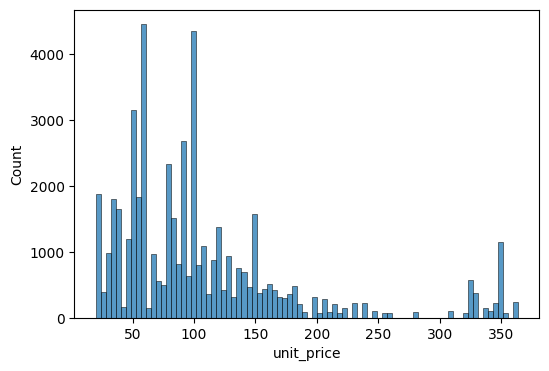

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(data['unit_price']); #,bins=15

In [ ]:
data['total_price_log'] = np.log(data['total_price'])
data['unit_price_log'] = np.log(data['unit_price'])
data['qty_log'] = np.log(data['qty'] + 1)

**The reason of applying a logarithmic transformation is to stabilize the variance and make the relationship between variables more linear.**

**Price optimization models typically work on relative changes rather than absolute values. If you apply a logarithmic transformation to your price or target variable, it will have the effect of compressing the range of values. As a result, the model will learn the relative changes in prices, which is often more appropriate for price optimization tasks**

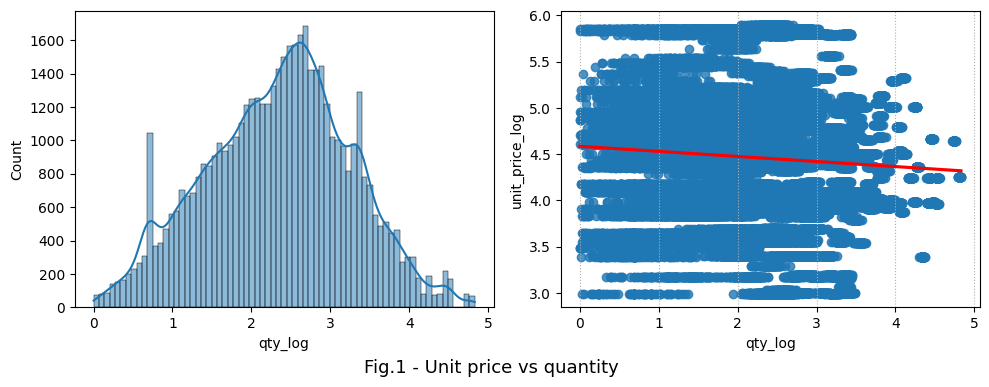

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))

fig = sns.histplot(data['qty_log'], ax=ax[0], kde=True); #,bins=15
fig = sns.regplot(data, y='unit_price_log', ax=ax[1], x='qty_log', line_kws={"color": "red"}) #
ax[1].xaxis.grid(linestyle=':')


ax[0].set_title('Fig.1 - Unit price vs quantity ', y=-0.25, fontsize=13, x=1) #
plt.tight_layout()

**'unit_price' vs 'comp_1', 'comp_2', 'comp_3'**

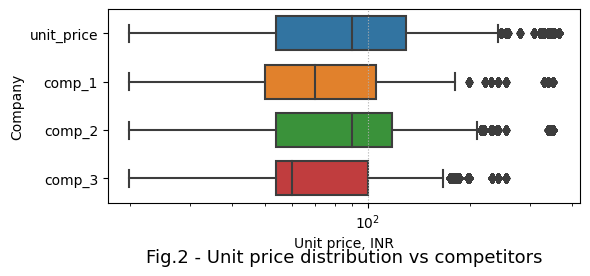

In [ ]:
fig, ax = plt.subplots( figsize=(6,3))
sns.boxplot(data[['unit_price', 'comp_1', 'comp_2', 'comp_3']], width=0.7, orient='h')
ax.xaxis.grid(linestyle=':')
ax.set_xscale('log')
ax.set_xlabel('Unit price, INR')
ax.set_ylabel('Company')

ax.set_title(f'Fig.2 - Unit price distribution vs competitors', y=-0.35, fontsize=13, loc='center')
plt.tight_layout()

In [ ]:
data[['unit_price', 'comp_1', 'comp_2', 'comp_3']].median()


unit_price    89.90
comp_1        69.90
comp_2        89.99
comp_3        59.90
dtype: float64

In [ ]:
data[['comp_1', 'comp_2', 'comp_3']] = data[['comp_1', 'comp_2', 'comp_3']].apply(np.log)


**freight_price, fp1,fp2, fp3**

In [ ]:
data[['freight_price', 'fp1', 'fp2', 'fp3']].head()

,freight_price,fp1,fp2,fp3
0,15.100000,15.011897,8.760000,15.100000
1,12.933333,14.769216,21.322000,12.933333
2,14.840000,13.993833,22.195932,14.840000
3,14.287500,14.656757,19.412885,14.287500
4,15.100000,18.776522,24.324687,15.100000


Text(0.5, -0.25, 'Fig.3- Freight price comparison vs competitors')

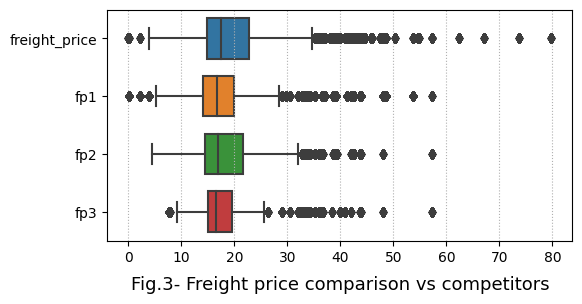

In [ ]:
fig, ax = plt.subplots( figsize=(6,3))
sns.boxplot(data[['freight_price', 'fp1', 'fp2', 'fp3']], width=0.7, orient='h')
ax.xaxis.grid(linestyle=':')
#ax.set_xscale('log')

ax.set_title(f'Fig.3- Freight price comparison vs competitors', y=-0.25, fontsize=13, loc='center')

In [ ]:
mask = data['freight_price']<4
data[mask]

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,total_price_log,unit_price_log,qty_log
276,watches6,watches_gifts,2018-04,85.000000,8980.133125,2.181647,105.648625,33,523,3,...,4.653960,4.2,13.631429,5.011524,3.8,19.447778,117.441290,9.102770,4.660119,4.454347
277,watches6,watches_gifts,2018-05,114.000000,11832.347668,0.095439,103.792523,33,523,3,...,4.653960,4.2,11.377297,4.886818,3.8,15.762187,105.648625,9.378592,4.642394,4.744932
388,watches5,watches_gifts,2018-05,17.000000,3383.000000,0.000000,199.000000,42,236,1,...,4.653960,4.2,11.377297,4.886818,3.8,15.762187,204.384615,8.126518,5.293305,2.890372
503,furniture2,furniture_decor,2018-05,92.000000,6430.800000,3.801630,69.900000,44,903,6,...,3.555348,3.7,14.634545,4.604170,4.4,19.410769,69.900000,8.768854,4.247066,4.532599
847,furniture2,furniture_decor,2018-05,92.632066,6474.981441,3.801630,69.900000,44,903,6,...,3.555348,3.7,14.634545,4.604170,4.4,19.410769,69.900000,8.775701,4.247066,4.539373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49127,furniture2,furniture_decor,2018-05,93.404966,6529.007135,3.801630,69.900000,44,903,6,...,3.555348,3.7,14.634545,4.604170,4.4,19.410769,69.900000,8.784010,4.247066,4.547594
49555,furniture2,furniture_decor,2018-05,91.313432,6382.808863,3.801630,69.900000,44,903,6,...,3.555348,3.7,14.634545,4.604170,4.4,19.410769,69.900000,8.761364,4.247066,4.525190
49906,watches6,watches_gifts,2018-04,84.727114,8951.303135,2.181647,105.648625,33,523,3,...,4.653960,4.2,13.631429,5.011524,3.8,19.447778,117.441290,9.099554,4.660119,4.451169
49942,watches6,watches_gifts,2018-05,112.165265,11641.915914,0.095439,103.792523,33,523,3,...,4.653960,4.2,11.377297,4.886818,3.8,15.762187,105.648625,9.362367,4.642394,4.728849


In [ ]:
data['freight_price'].describe()

count    50000.000000
mean        20.671264
std         10.058024
min          0.000000
25%         14.769216
50%         17.519444
75%         22.819231
max         79.760000
Name: freight_price, dtype: float64

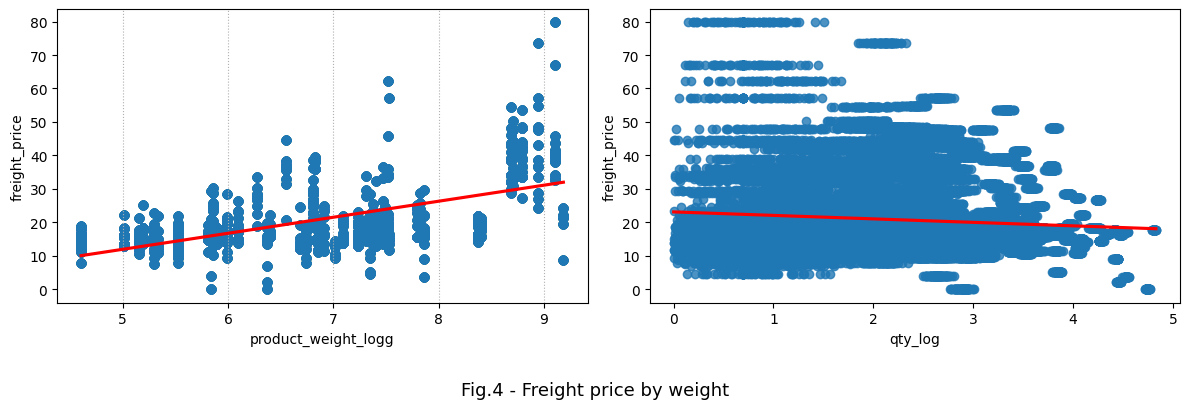

In [ ]:
data['product_weight_logg'] = np.log(data['product_weight_g'])

fig, ax = plt.subplots(1,2, figsize=(12, 4))

sns.regplot(data, x='product_weight_logg', y='freight_price', ax=ax[0] , line_kws={"color": "red"}) #
sns.regplot(data, x='qty_log', y='freight_price', ax=ax[1] , line_kws={"color": "red"})
#ax[0].set_yscale('log')

ax[0].xaxis.grid(linestyle=':')

fig.suptitle('Fig.4 - Freight price by weight', y=-0.05, fontsize=13) #, loc='right'
plt.tight_layout()

**qty**

In [ ]:
mask = data['qty']<0
data[mask]

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,ps2,fp2,comp_3,ps3,fp3,lag_price,total_price_log,unit_price_log,qty_log,product_weight_logg


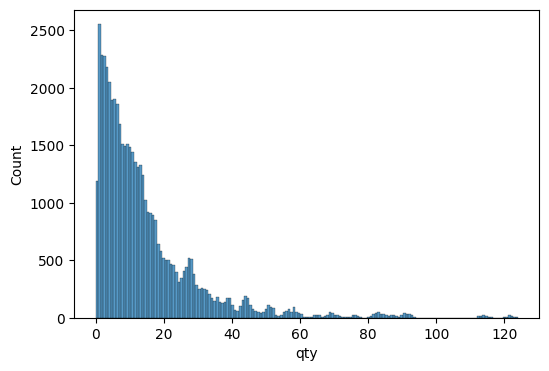

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(data['qty']); #,bins=15

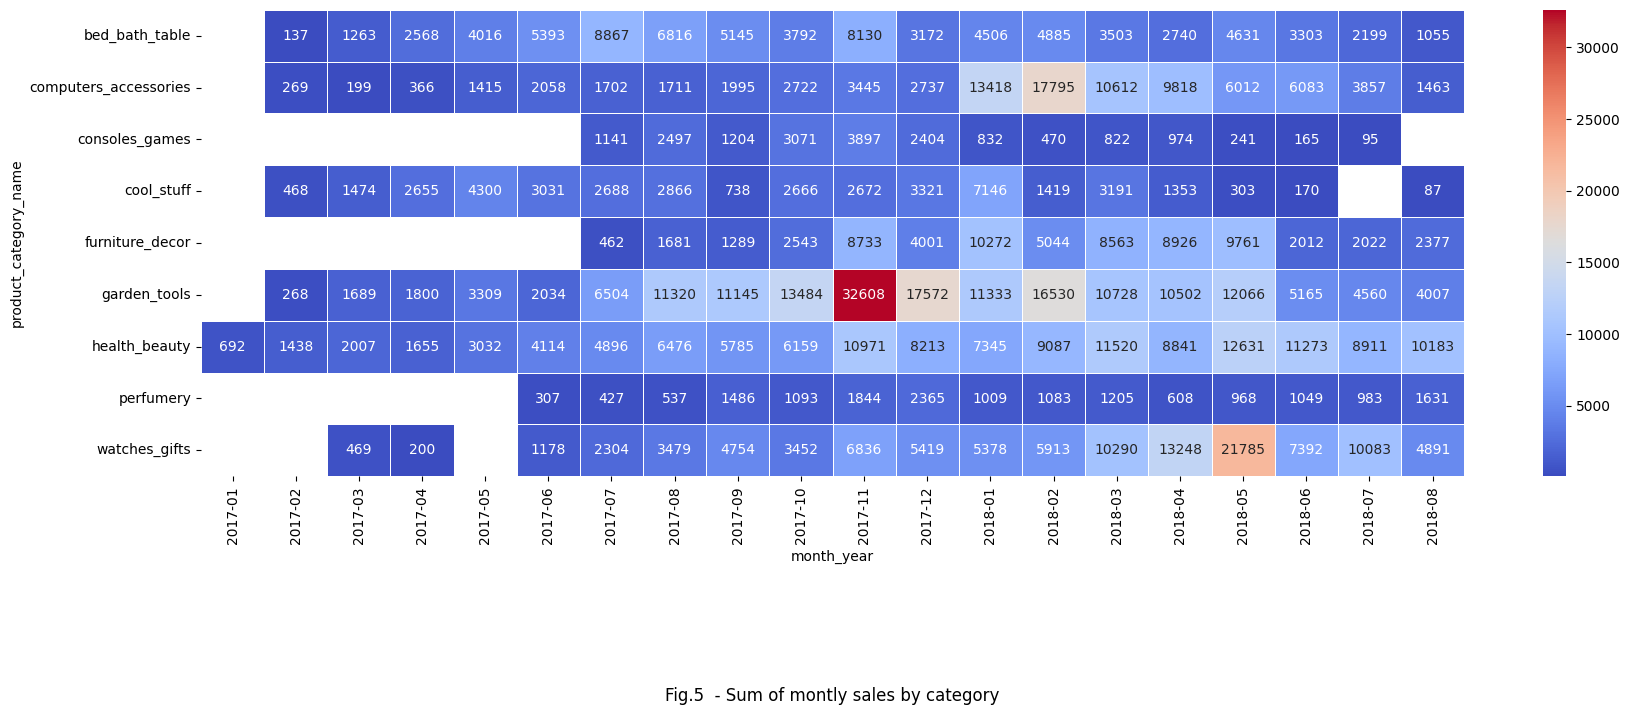

In [ ]:

#mask = data['product_category_name']!='garden_tools'
temp = data.pivot_table(
    values='qty',
    index='product_category_name',
    columns='month_year',
    aggfunc='sum')

means =  temp.loc[:,:'2017-12'].T.mean()
#temp = temp.values / means

fig,ax = plt.subplots(figsize=(18, 8))

fig = sns.heatmap(temp, annot=True, fmt='.0f',  linewidths=.5, cmap= 'coolwarm') #vmin=-1, vmax=1, fmt='.1g'center= 0,

ax.set_title(f'Fig.5  - Sum of montly sales by category', y=-0.5, fontsize=12);
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()

**product_id**

In [ ]:
display(f"Number of unique categories: {data['product_id'].nunique()}")
data['product_id'].value_counts()

'Number of unique categories: 52'

health7       1472
health5       1461
bed2          1388
computers4    1341
garden3       1334
garden1       1322
watches1      1291
health9       1277
health8       1237
garden9       1235
bed1          1229
garden2       1225
garden10      1210
garden6       1195
garden7       1195
computers1    1150
cool1         1132
watches3      1132
watches2      1096
garden5       1046
garden8       1016
garden4        997
watches6       991
furniture2     991
furniture1     966
cool2          964
cool5          959
watches7       955
health2        944
furniture3     917
perfumery1     896
perfumery2     891
consoles1      880
health4        833
computers3     799
bed3           798
consoles2      763
furniture4     763
watches5       739
computers2     738
watches8       732
watches4       700
health1        693
bed4           677
computers6     641
cool4          641
computers5     624
health3        609
health10       512
health6        512
cool3          510
bed5           381
Name: produc

In [ ]:
mask = data['product_id']=='health5'
data[mask].sort_values(by=['month_year'])

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,ps2,fp2,comp_3,ps3,fp3,lag_price,total_price_log,unit_price_log,qty_log,product_weight_logg
339,health5,health_beauty,2017-01,8.000000,2799.200000,22.901250,349.9,51,625,1,...,4.3,22.901250,4.174233,3.9,11.060000,349.85,7.937089,5.857647,2.197225,6.802395
35218,health5,health_beauty,2017-01,6.611642,2313.413376,22.901250,349.9,51,625,1,...,4.3,22.901250,4.174233,3.9,11.060000,349.85,7.746479,5.857647,2.029679,6.802395
14902,health5,health_beauty,2017-01,8.226227,2878.356963,22.901250,349.9,51,625,1,...,4.3,22.901250,4.174233,3.9,11.060000,349.85,7.964975,5.857647,2.222050,6.802395
44648,health5,health_beauty,2017-01,9.458343,3309.474104,22.901250,349.9,51,625,1,...,4.3,22.901250,4.174233,3.9,11.060000,349.85,8.104545,5.857647,2.347400,6.802395
31043,health5,health_beauty,2017-01,8.989046,3145.267191,22.901250,349.9,51,625,1,...,4.3,22.901250,4.174233,3.9,11.060000,349.85,8.053654,5.857647,2.301489,6.802395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8612,health5,health_beauty,2018-08,10.468597,3810.569222,28.551111,364.0,51,625,1,...,4.1,12.418571,4.077368,3.9,12.083333,364.00,8.245534,5.897154,2.439613,6.802395
8593,health5,health_beauty,2018-08,9.336883,3398.625358,28.551111,364.0,51,625,1,...,4.1,12.418571,4.077368,3.9,12.083333,364.00,8.131126,5.897154,2.335718,6.802395
7951,health5,health_beauty,2018-08,10.581305,3851.594977,28.551111,364.0,51,625,1,...,4.1,12.418571,4.077368,3.9,12.083333,364.00,8.256243,5.897154,2.449392,6.802395
9170,health5,health_beauty,2018-08,6.692746,2436.159658,28.551111,364.0,51,625,1,...,4.1,12.418571,4.077368,3.9,12.083333,364.00,7.798178,5.897154,2.040278,6.802395


In [ ]:
temp = data['product_id'].str.split('([A-Za-z]+)', expand=True)#.iloc[:,1] #(\d+)
#display(temp)
data['product_subcategory'] = temp[2].astype('category')
temp[1].value_counts()

garden       11775
health        9550
watches       7636
computers     5293
bed           4473
cool          4206
furniture     3637
perfumery     1787
consoles      1643
Name: 1, dtype: int64

**product_category_name**

In [ ]:
data['product_category_name'].value_counts()

garden_tools             11775
health_beauty             9550
watches_gifts             7636
computers_accessories     5293
bed_bath_table            4473
cool_stuff                4206
furniture_decor           3637
perfumery                 1787
consoles_games            1643
Name: product_category_name, dtype: int64

**customers**

In [ ]:
data['customers']

0         57
1         61
2        123
3         90
4         54
        ... 
49995     38
49996    260
49997     54
49998     90
49999     54
Name: customers, Length: 50000, dtype: int64

In [ ]:
mask = data['product_id']=='bed1'
any(data[mask].groupby(['month_year'])['customers'].min() == data[mask].groupby(['month_year'])['customers'].max())

True

In [ ]:
data[['total_price', 'volume','customers', 'unit_price','s','qty']]

,total_price,volume,customers,unit_price,s,qty
0,45.950000,3800,57,45.95,10.267394,1.000000
1,137.850000,3800,61,45.95,6.503115,3.000000
2,275.700000,3800,123,45.95,12.071651,6.000000
3,183.800000,3800,90,45.95,9.293873,4.000000
4,91.900000,3800,54,45.95,5.555556,2.000000
...,...,...,...,...,...,...
49995,162.356634,32736,38,99.99,4.109589,1.623729
49996,3750.906373,3510,260,199.00,22.077922,18.848776
49997,281.184051,32560,54,49.90,8.711434,5.634951
49998,3222.657731,20000,90,89.90,7.887578,35.847138


**'weekday','weekend', 'holiday'**

In [ ]:
data.groupby(['month_year'])[['weekday','weekend', 'holiday']].min().head(9)

,weekday,weekend,holiday
month_year,,,
2017-01,22,9,1
2017-02,20,8,2
2017-03,23,8,1
2017-04,20,10,2
2017-05,23,8,1
2017-06,22,8,1
2017-07,21,10,1
2017-08,23,8,1
2017-09,21,9,1


In [ ]:
any(data.groupby(['month_year'])['weekday'].min() == data.groupby(['month_year'])['weekday']. max())

True

***lag_price***

In [ ]:
data[['month_year', 'lag_price', 'unit_price']]

,month_year,lag_price,unit_price
0,2017-05,45.900000,45.95
1,2017-06,45.950000,45.95
2,2017-07,45.950000,45.95
3,2017-08,45.950000,45.95
4,2017-09,45.950000,45.95
...,...,...,...
49995,2017-12,99.990000,99.99
49996,2018-05,204.384615,199.00
49997,2018-07,49.900000,49.90
49998,2017-08,89.900000,89.90


In [ ]:
mask = (data['product_id']=='bed1')
print(data[mask].groupby(['month_year'])[['unit_price', 'lag_price']].mean().values)

mask = (data['product_id']=='bed1')
data[mask].groupby(['month_year'])['unit_price'].min()[:-1].values == data[mask].groupby(['month_year'])['lag_price'].max()[1:].values

[[45.95       45.9       ]
 [45.95       45.95      ]
 [45.95       45.95      ]
 [45.95       45.95      ]
 [45.95       45.95      ]
 [45.95       45.95      ]
 [40.53181818 45.95      ]
 [39.99       40.53181818]
 [39.99       39.99      ]
 [39.99       39.99      ]
 [39.99       39.99      ]
 [39.99       39.99      ]
 [39.99       39.99      ]
 [39.99       39.99      ]
 [39.99       39.99      ]
 [39.24       39.99      ]]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [ ]:
data['lag_price'].corr(data['unit_price'])

0.9940558375512517

**product_photos_qty**

In [ ]:
data['product_photos_qty'].value_counts()


1    25089
2    13661
3     4780
4     2967
6     1935
5     1058
8      510
Name: product_photos_qty, dtype: int64

In [ ]:
temp = data.groupby(['product_id'])['product_photos_qty'].agg(['min','max']).values.flatten()
print(temp)
np.where(temp != temp.round())

[2 2 1 1 1 1 5 5 5 5 1 1 1 1 1 1 1 1 1 1 1 1 4 4 3 3 1 1 1 1 8 8 1 1 1 1 1
 1 6 6 1 1 1 1 1 1 2 2 2 2 1 1 2 2 1 1 2 2 2 2 2 2 2 2 3 3 1 1 6 6 1 1 1 1
 1 1 1 1 2 2 3 3 1 1 2 2 1 1 2 2 3 3 4 4 2 2 1 1 3 3 4 4 1 1]


(array([], dtype=int64),)

**product_weight_g**

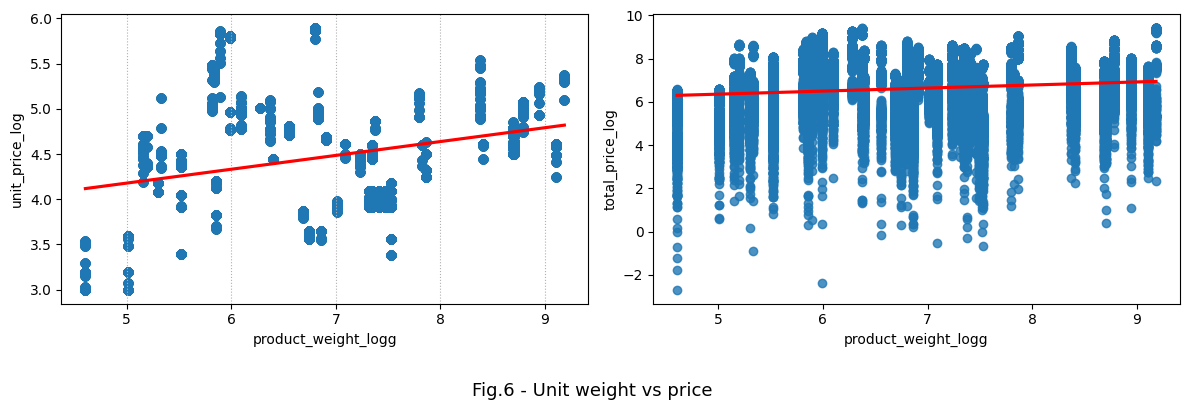

In [ ]:
data['product_weight_logg'] = np.log(data['product_weight_g'])

fig, ax = plt.subplots(1,2, figsize=(12, 4))
#fig = sns.histplot(data['qty_log'], ax=ax[0]); #,bins=15
sns.regplot(data, x='product_weight_logg', y='unit_price_log', ax=ax[0] , line_kws={"color": "red"}) #
sns.regplot(data, x='product_weight_logg', y='total_price_log', ax=ax[1] , line_kws={"color": "red"})
#ax[0].set_yscale('log')

ax[0].xaxis.grid(linestyle=':')
plot_counter=1
fig.suptitle('Fig.6 - Unit weight vs price ', y=-0.05, fontsize=13) #, loc='right'
plt.tight_layout()

In [ ]:
data[['product_weight_g']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   product_weight_g  50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB


**product_score, ps1, ps2, ps3**

In [ ]:
data['product_score'].value_counts()

4.2    11397
4.1     8880
4.3     8745
3.9     5267
4.0     4710
3.8     3542
4.4     2545
3.7     1921
3.5     1362
4.5      833
3.3      798
Name: product_score, dtype: int64

In [ ]:
any(data.groupby(['product_id'])['product_score'].min() == data.groupby(['product_id'])['product_score'].max())

True

In [ ]:
data[['product_score', 'ps1', 'ps2', 'ps3']]

,product_score,ps1,ps2,ps3
0,4.0,3.9,4.4,4.0
1,4.0,3.9,4.4,4.0
2,4.0,3.9,4.4,4.0
3,4.0,3.9,4.4,4.0
4,4.0,3.9,4.4,4.0
...,...,...,...,...
49995,4.3,4.2,4.3,4.3
49996,4.1,4.2,4.2,3.8
49997,4.2,4.1,4.2,4.1
49998,3.9,3.9,4.4,4.0


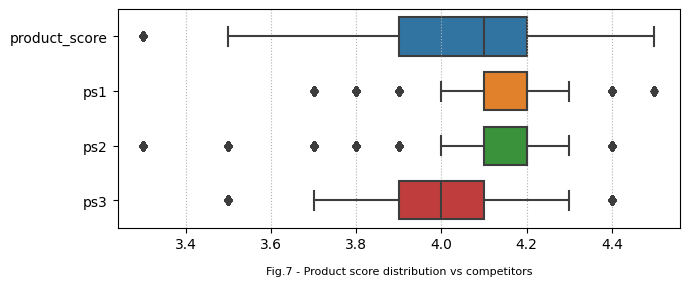

In [ ]:
fig, ax = plt.subplots( figsize=(7,3))
sns.boxplot(data[['product_score','ps1', 'ps2', 'ps3']], width=0.7, orient='h')
ax.xaxis.grid(linestyle=':')

ax.set_title(f'Fig.7 - Product score distribution vs competitors', y=-0.25, fontsize=8, loc='center')

plt.tight_layout()

In [ ]:
any(data.groupby(['product_id'])['ps1'].min() == data.groupby(['product_id'])['ps1'].max())

True

**s**

In [ ]:
data['s']

0        10.267394
1         6.503115
2        12.071651
3         9.293873
4         5.555556
           ...    
49995     4.109589
49996    22.077922
49997     8.711434
49998     7.887578
49999     7.510204
Name: s, Length: 50000, dtype: float64

In [ ]:
data.groupby(['product_id'])['s'].agg(['min', 'max', 'mean'])

,min,max,mean
product_id,,,
bed1,5.555556,30.555556,12.594928
bed2,3.899721,18.234244,10.561281
bed3,1.351351,59.459459,18.610716
bed4,3.448276,43.835616,20.479567
bed5,0.649351,38.311688,19.732761
computers1,2.702703,30.392157,13.215156
computers2,1.176471,92.307692,19.247876
computers3,2.105263,62.500000,19.485541
computers4,4.961735,23.958333,10.898612


# **Comparison with Competitor Products**

competitor analysis is quite essential, therefore, we compare the unit and shipping prices of every product to those of 3 different competitors. For this, we simply calculate the difference between each pair.

**Price**

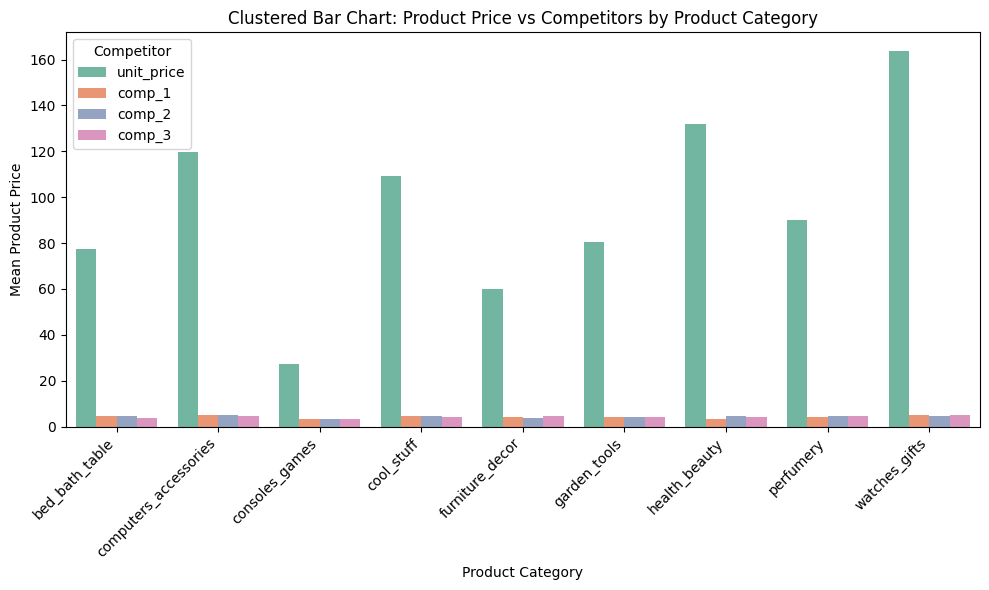

In [ ]:
"""
# Create a clustered bar chart
plt.figure(figsize=(10, 6))

# Group by 'product_category_name' and calculate the mean product score for each competitor
grouped_data = data.groupby('product_category_name')[['unit_price', 'comp_1', 'comp_2', 'comp_3']].mean().reset_index()

# Melt the DataFrame to convert it to long format for Seaborn's barplot
melted_data = pd.melt(grouped_data, id_vars='product_category_name', value_vars=['unit_price', 'comp_1', 'comp_2', 'comp_3'],
                      var_name='Competitor', value_name='Price')

# Plot the clustered bar chart
sns.barplot(x='product_category_name', y='Price', hue='Competitor', data=melted_data, palette='Set2')

# Set labels and title
plt.xlabel('Product Category')
plt.ylabel('Mean Product Price')
plt.title('Clustered Bar Chart: Product Price vs Competitors by Product Category')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the legend
plt.legend(title='Competitor', loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()
"""

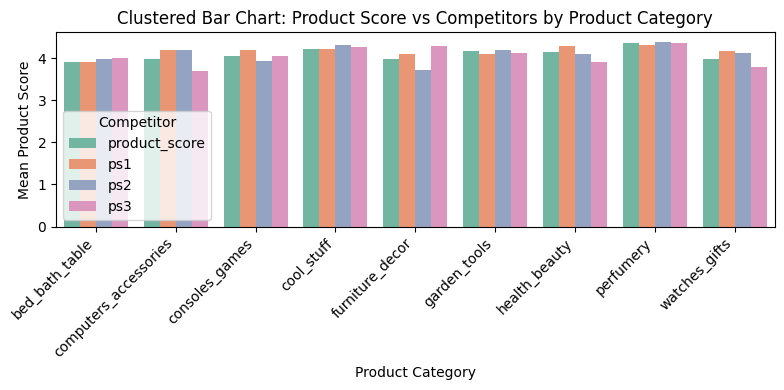

In [ ]:
# Create a clustered bar chart
plt.figure(figsize=(8, 4))

# Group by 'product_category_name' and calculate the mean product score for each competitor
grouped_data = data.groupby('product_category_name')[['product_score', 'ps1', 'ps2', 'ps3']].mean().reset_index()

# Melt the DataFrame to convert it to long format for Seaborn's barplot
melted_data = pd.melt(grouped_data, id_vars='product_category_name', value_vars=['product_score', 'ps1', 'ps2', 'ps3'],
                      var_name='Competitor', value_name='Score')

# Plot the clustered bar chart
sns.barplot(x='product_category_name', y='Score', hue='Competitor', data=melted_data, palette='Set2')

# Set labels and title
plt.xlabel('Product Category')
plt.ylabel('Mean Product Score')
plt.title('Clustered Bar Chart: Product Score vs Competitors by Product Category')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the legend
plt.legend(title='Competitor', loc='lower left')

# Display the plot
plt.tight_layout()
plt.show()

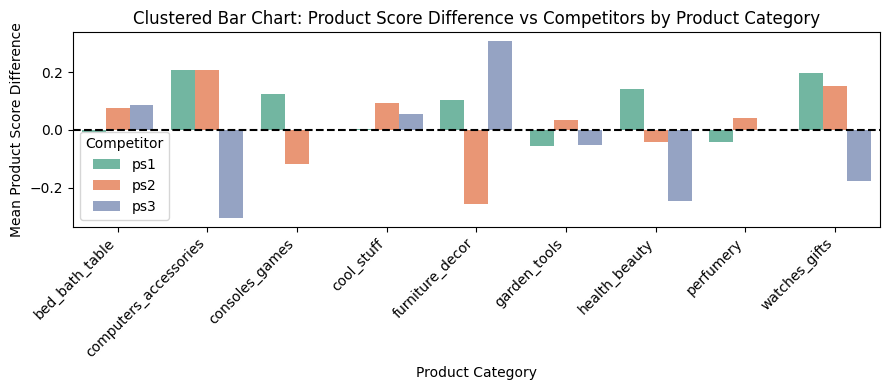

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a clustered bar chart
plt.figure(figsize=(9, 4))

# Group by 'product_category_name' and calculate the mean product score for each competitor
grouped_data = data.groupby('product_category_name')[['product_score', 'ps1', 'ps2', 'ps3']].mean().reset_index()

# Calculate the difference between competitors' scores and product_score
competitors = ['ps1', 'ps2', 'ps3']
for competitor in competitors:
    grouped_data[competitor] = grouped_data[competitor] - grouped_data['product_score']

# Melt the DataFrame to convert it to long format for Seaborn's barplot
melted_data = pd.melt(grouped_data, id_vars='product_category_name', value_vars=competitors,
                      var_name='Competitor', value_name='Score Difference')

# Plot the clustered bar chart
sns.barplot(x='product_category_name', y='Score Difference', hue='Competitor', data=melted_data, palette='Set2')

# Add a line at y=0 for better interpretation
plt.axhline(y=0, color='black', linestyle='--')

# Set labels and title
plt.xlabel('Product Category')
plt.ylabel('Mean Product Score Difference')
plt.title('Clustered Bar Chart: Product Score Difference vs Competitors by Product Category')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the legend
plt.legend(title='Competitor', loc='lower left')

# Display the plot
plt.tight_layout()
plt.show()


# **Feature engineering**

**preparation**

In [ ]:
data2 = data.copy()
data2.drop(['product_id','month_year', 'year', 'qty', 'lag_price', 'unit_price','total_price','product_category_name', 'product_subcategory','product_description_lenght', 'product_weight_g'], axis=1, inplace=True)

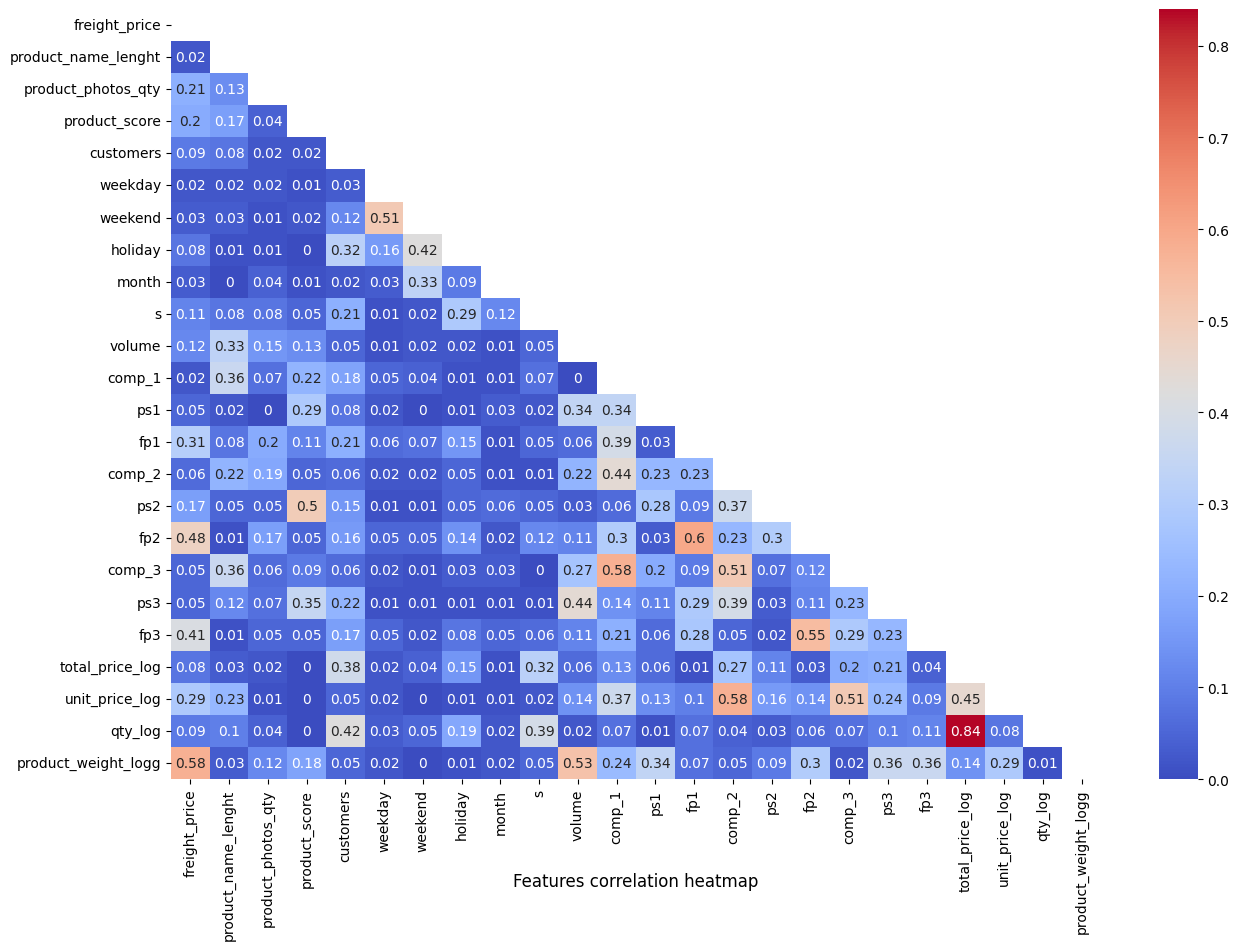

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

matrix = np.triu(data2.corr())
fig = sns.heatmap(round(abs(data2.corr()),2), annot=True,  cmap= 'coolwarm', mask=matrix) #, vmin=-1, vmax=1, center= 0, fmt='.02g',
ax.set_title('Features correlation heatmap', y=-0.15, fontsize=12);

In [ ]:
data2.columns

Index(['freight_price', 'product_name_lenght', 'product_photos_qty',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3',
       'ps3', 'fp3', 'total_price_log', 'unit_price_log', 'qty_log',
       'product_weight_logg'],
      dtype='object')

In [ ]:
X = data2.drop(['unit_price_log'], axis=1)
y = data2['unit_price_log']

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_features = [s for s in X.columns if X[s].dtypes in numerics]
cat_features = [s for s in X.columns if X[s].dtypes == 'object' or X[s].dtypes == 'category']

print(num_features)
print(cat_features)

['freight_price', 'product_name_lenght', 'product_photos_qty', 'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3', 'total_price_log', 'qty_log', 'product_weight_logg']
[]


# **Linear Regression (Benchmark Model)**

In [ ]:
from sklearn.impute import SimpleImputer

# Check for missing values
missing_values = data2.isnull().sum()

# Get columns with missing values
columns_with_missing = missing_values[missing_values > 0]

if columns_with_missing.empty:
    print("No missing values in any column.")
else:
    print("Missing values found in the following columns:")
    print(columns_with_missing)

No missing values in any column.


In [ ]:
# Impute missing values with the mean value of the column
imputer = SimpleImputer(strategy='mean')
#data2['qty_log'] = imputer.fit_transform(data[['qty_log']])

In [ ]:
X = data2.drop(['unit_price_log'], axis=1)
y = data2['unit_price_log']

In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Check the shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (40000, 23)
X_test shape: (10000, 23)
y_train shape: (40000,)
y_test shape: (10000,)


In [ ]:
# Create the linear regression model
model = LinearRegression()

In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Evaluate the model on training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate the model on test data
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [ ]:
# Get the coefficient values along with feature names
coefficients = pd.DataFrame({'Feature': feature_cols, 'Coefficient': model.coef_})
print(coefficients)

                Feature   Coefficient
0         freight_price  3.411181e-03
1   product_name_lenght -2.717835e-04
2    product_photos_qty  2.681455e-02
3         product_score -2.098635e-03
4             customers  3.077018e-04
5               weekday -1.080788e-03
6               weekend -3.470458e-04
7               holiday  9.291076e-03
8                 month -1.015212e-03
9                     s  8.298043e-04
10               volume  3.140761e-07
11               comp_1  4.040244e-03
12                  ps1  4.272918e-02
13                  fp1  3.893645e-04
14               comp_2  1.446930e-01
15                  ps2 -5.102227e-02
16                  fp2 -4.802915e-03
17               comp_3  6.580204e-02
18                  ps3 -9.609826e-02
19                  fp3 -8.293365e-04
20      total_price_log  7.879871e-01
21              qty_log -9.807679e-01
22  product_weight_logg  3.935371e-02


In [ ]:
# Print the model's coefficients and performance metrics
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("\n\nTraining Mean Squared Error:", train_mse)
print("Training R-squared:", train_r2)
print("\n\nTest Mean Squared Error:", test_mse)
print("Test R-squared:", test_r2)

Coefficients: [ 3.41118051e-03 -2.71783464e-04  2.68145477e-02 -2.09863518e-03
  3.07701777e-04 -1.08078796e-03 -3.47045849e-04  9.29107553e-03
 -1.01521196e-03  8.29804281e-04  3.14076089e-07  4.04024392e-03
  4.27291791e-02  3.89364487e-04  1.44693018e-01 -5.10222675e-02
 -4.80291467e-03  6.58020352e-02 -9.60982567e-02 -8.29336453e-04
  7.87987136e-01 -9.80767918e-01  3.93537133e-02]
Intercept: 0.7269816223645842


Training Mean Squared Error: 0.02992600542249717
Training R-squared: 0.9294758281695723


Test Mean Squared Error: 0.030893698196822264
Test R-squared: 0.9272967346632242


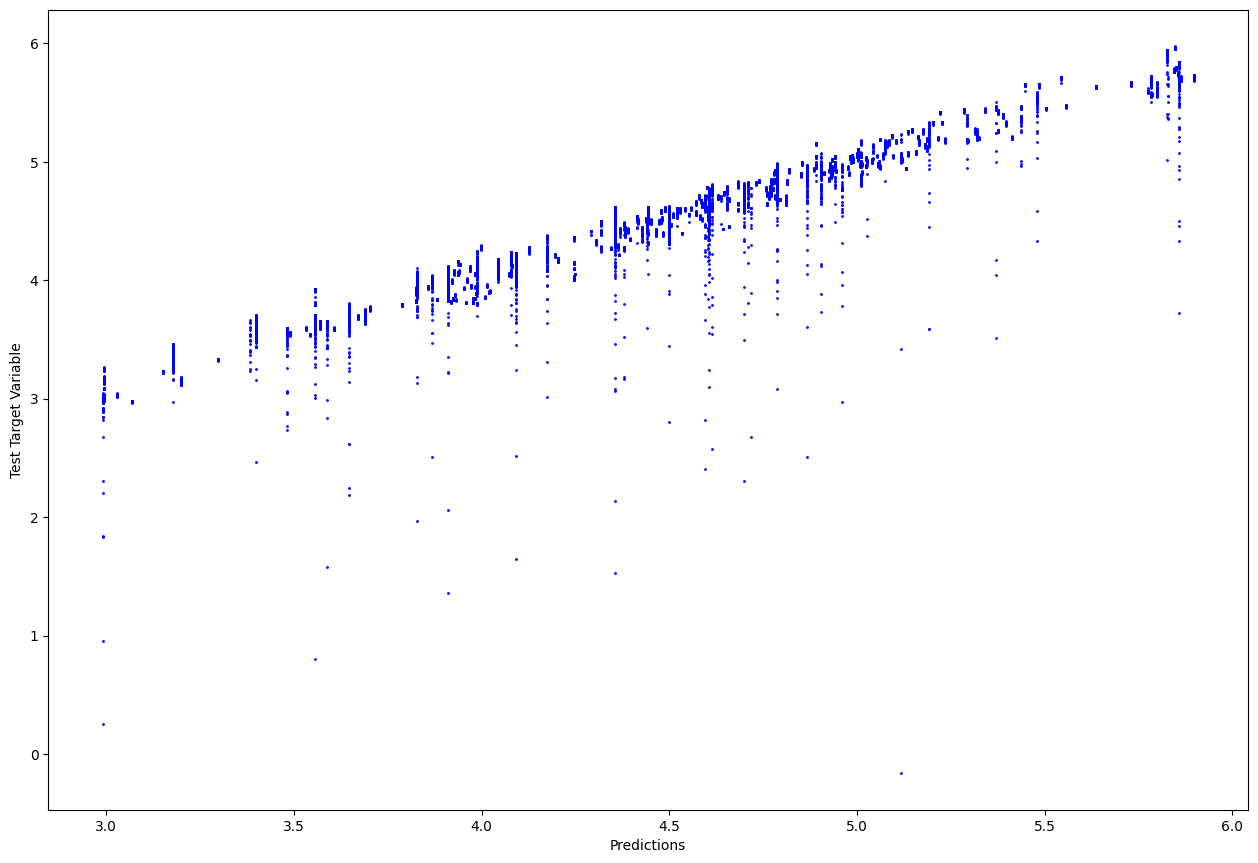

In [ ]:
# Predecting Reference values with the test dataset
y_pred = model.predict(X_test)

# Plotting predictions vs. y_test
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xlabel("Predictions")
ax.set_ylabel("Test Target Variable")
ax.plot(y_test, y_pred, 'bo', ms=1)

# Display the plot
plt.show()

# **1st model: Neural Network**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error

In [ ]:
#Loading the data
X = data2.drop(['unit_price_log'], axis=1)
y = data2['unit_price_log']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Check the shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (37500, 23)
X_test shape: (12500, 23)
y_train shape: (37500,)
y_test shape: (12500,)


In [ ]:
# Create a deep neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Output layer with 1 neuron for prediction
])

In [ ]:
# Compile the model with Mean Absolute Error (MAE) loss
model.compile(optimizer='adam', loss='mean_absolute_error')

In [ ]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
1172/1172 [==============================] - 3s 2ms/step - loss: 17.3682 - val_loss: 14.5349
Epoch 2/100
1172/1172 [==============================] - 2s 2ms/step - loss: 12.5874 - val_loss: 2.1391
Epoch 3/100
1172/1172 [==============================] - 3s 2ms/step - loss: 8.1697 - val_loss: 4.0471
Epoch 4/100
1172/1172 [==============================] - 3s 2ms/step - loss: 5.8525 - val_loss: 4.9398
Epoch 5/100
1172/1172 [==============================] - 2s 2ms/step - loss: 4.4953 - val_loss: 1.2265
Epoch 6/100
1172/1172 [==============================] - 2s 2ms/step - loss: 2.8816 - val_loss: 1.6371
Epoch 7/100
1172/1172 [==============================] - 2s 2ms/step - loss: 1.8576 - val_loss: 1.5814
Epoch 8/100
1172/1172 [==============================] - 2s 2ms/step - loss: 1.2944 - val_loss: 0.4712
Epoch 9/100
1172/1172 [==============================] - 2s 2ms/step - loss: 0.9928 - val_loss: 0.7326
Epoch 10/100
1172/1172 [==============================] - 2s 2ms/step 

In [ ]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MAE): {test_loss}")

391/391 [==============================] - 1s 1ms/step - loss: 0.4423
Test Loss (MAE): 0.44233399629592896


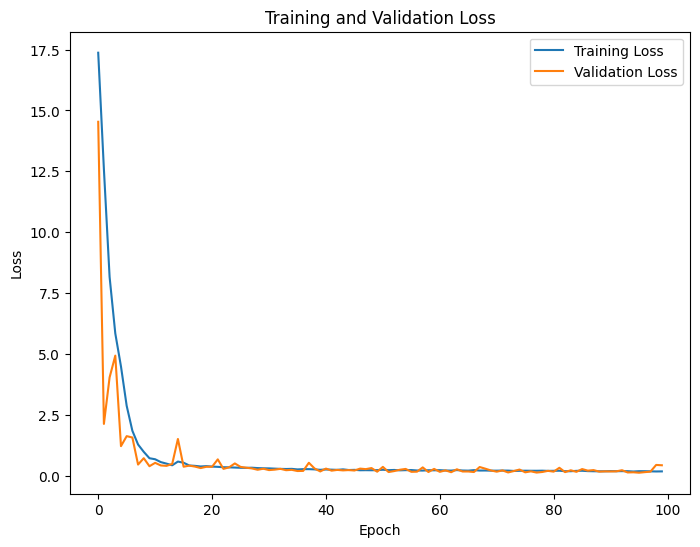

In [ ]:
# Plot the training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Make predictions on the test data
predictions = model.predict(X_test)

391/391 [==============================] - 1s 1ms/step


In [ ]:
# Calculate R-squared (coefficient of determination)
def r_squared(y_true, y_pred):
    residual = tf.reduce_sum(tf.square(tf.subtract(y_true, y_pred)))
    total = tf.reduce_sum(tf.square(tf.subtract(y_true, tf.reduce_mean(y_true))))
    r2 = 1 - tf.divide(residual, total)
    return r2

r2 = r_squared(y_test, predictions).numpy()
print(f"R-squared: {r2}")

R-squared: -30988.286273867376


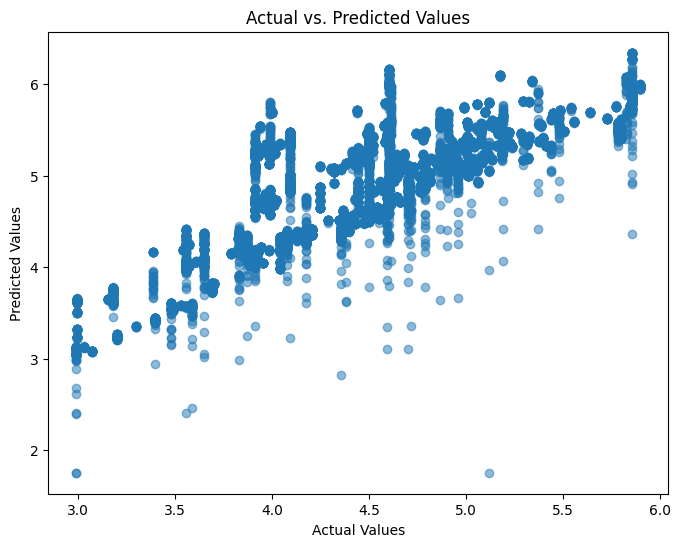

In [ ]:
# Visualize the predicted values against the actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# **2nd model: Gradient Boosting Regressor**


In [ ]:
#Loading the data
X = data2.drop(['unit_price_log'], axis=1)
y = data2['unit_price_log']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Check the shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (37500, 23)
X_test shape: (12500, 23)
y_train shape: (37500,)
y_test shape: (12500,)


In [ ]:
# Train the model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)

In [ ]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(np.exp(y_test), np.exp(y_pred)) * 100

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(np.exp(y_train), np.exp(y_train_pred)) * 100

In [ ]:
print("Testing Evaluation")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

print("\nTraining Evaluation")
print("Mean Squared Error (MSE):", train_mse)
print("R-squared (R2):", train_r2)
print("Mean Absolute Percentage Error (MAPE):", train_mape)

Testing Evaluation
Mean Squared Error (MSE): 0.008385545146099786
R-squared (R2): 0.979952751350396
Mean Absolute Percentage Error (MAPE): 6.761232539893092

Training Evaluation
Mean Squared Error (MSE): 0.008154569026954817
R-squared (R2): 0.9807079000604877
Mean Absolute Percentage Error (MAPE): 6.6576739664106075


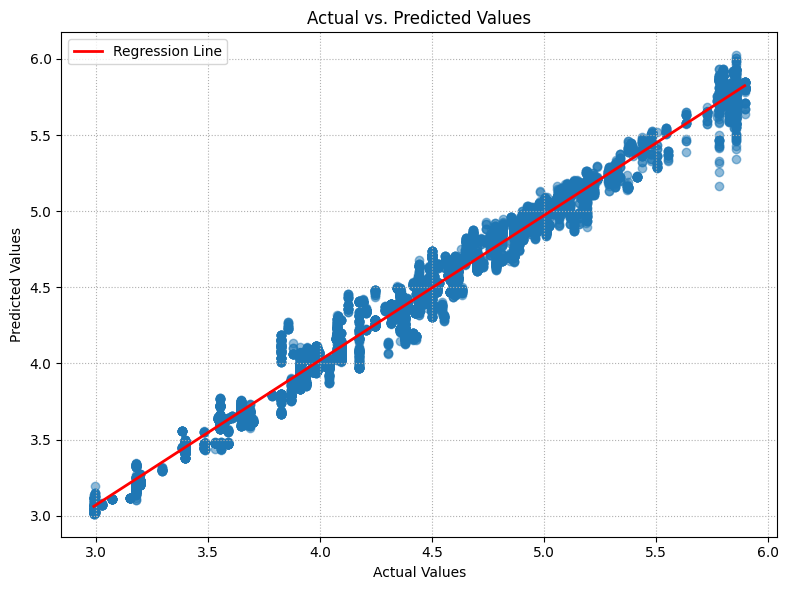

In [ ]:
# Visualize the predicted values against the actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Fit a regression line to the data
coefficients = np.polyfit(y_test, y_pred, 1)
polynomial = np.poly1d(coefficients)
x_vals = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_vals, polynomial(x_vals), color='red', linewidth=2, label='Regression Line')

plt.legend()  # Show the legend with the regression line label
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

In [ ]:
X_train.head()

,freight_price,product_name_lenght,product_photos_qty,product_score,customers,weekday,weekend,holiday,month,s,...,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,total_price_log,qty_log,product_weight_logg
27434,17.003333,35,3,4.0,73,21,10,1,12,8.108108,...,19.100000,4.682131,4.2,16.653846,5.225532,3.8,18.686000,6.902788,2.038379,6.095825
13400,23.526667,35,3,4.0,61,23,8,1,8,5.461712,...,13.440000,4.653960,4.2,23.385714,4.980526,3.8,21.897273,5.844554,1.253484,6.095825
883,21.852857,59,2,4.2,116,22,9,1,3,20.348837,...,20.359677,3.987130,4.2,21.852857,3.987130,4.1,19.024231,7.497840,3.540148,7.467371
7303,18.101538,49,1,3.7,18,21,9,0,6,13.684211,...,21.930000,3.555348,3.7,18.101538,4.604170,4.4,25.636000,6.094652,2.615266,6.745236
45124,13.710000,45,1,4.0,35,21,10,1,12,2.702703,...,38.570000,4.594109,4.0,13.710000,4.699571,3.5,25.249167,4.932947,0.876849,5.153292


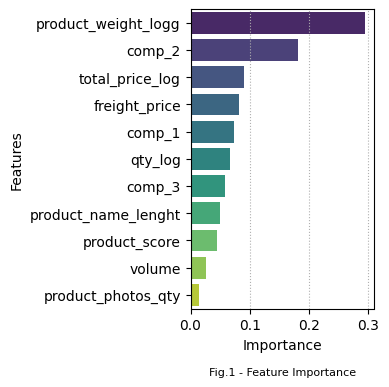

In [ ]:
# Get the feature importances from the Gradient Boosting Regressor model
feature_importances = model.feature_importances_

# Create a DataFrame to hold the feature importances with their corresponding names
coef_df = pd.DataFrame({'Features': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by absolute importance values in descending order
idx = coef_df.sort_values(by='Importance', key=abs, ascending=False).index
temp = coef_df.reindex(idx).iloc[:11]  # Select the top 11 most important features (change the number as needed)

# Plot the feature importances using a bar plot
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x='Importance', y='Features', data=temp, palette='viridis')

ax.set_title(f'Fig.1 - Feature Importance', y=-0.25, fontsize=8, loc='center')
ax.xaxis.grid(linestyle=':')
plt.tight_layout()
plt.show()

**DEMO**

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'PriceOptimize.pkl')

['PriceOptimize.pkl']

In [ ]:
sample_row = X_train.iloc[0]  # Change the index (0) to the desired row number

In [ ]:
print(sample_row)

freight_price            17.003333
product_name_lenght      35.000000
product_photos_qty        3.000000
product_score             4.000000
customers                73.000000
weekday                  21.000000
weekend                  10.000000
holiday                   1.000000
month                    12.000000
s                         8.108108
volume                 4480.000000
comp_1                    5.003946
ps1                       4.200000
fp1                      19.100000
comp_2                    4.682131
ps2                       4.200000
fp2                      16.653846
comp_3                    5.225532
ps3                       3.800000
fp3                      18.686000
total_price_log           6.902788
qty_log                   2.038379
product_weight_logg       6.095825
Name: 27434, dtype: float64


In [ ]:
import joblib

# Load the model
loaded_model = joblib.load('PriceOptimize.pkl')

# Create a sample row from X_train
sample_row = {
    'freight_price': 16.644286,
    'product_name_lenght': 54.000000,
    'product_photos_qty': 1.000000,
    'product_score': 4.200000,
    'customers': 22.000000,
    'weekday': 23.000000,
    'weekend': 8.000000,
    'holiday': 1.000000,
    'month': 3.000000,
    's': 17.417417,
    'volume': 15750.000000,
    'comp_1': 4.605070,
    'ps1': 4.200000,
    'fp1': 16.644286,
    'comp_2': 4.867458,
    'ps2': 4.300000,
    'fp2': 18.778750,
    'comp_3': 4.605070,
    'ps3': 4.200000,
    'fp3': 16.644286,
    'total_price_log': 7.270968,
    'qty_log': 2.733124,
    'product_weight_logg': 7.090077
}

# Convert the sample row to a DataFrame
import pandas as pd
test_data = pd.DataFrame([sample_row])

# Make a prediction
prediction = loaded_model.predict(test_data)

In [ ]:
# Display the output
print("Predicted unit price:", prediction)

Predicted unit price: [4.65516625]
